ARTÍCULO: La macroeconomía de la Cuarentena

Tienen que responder a manera de ensayo las siguientes preguntas:
	1. ¿Cuál es la pregunta de investigación del artículo?
	2. ¿Cuáles son las fortalezas y debilidades del enfoque del documento para responder a esa pregunta?
	3. ¿Cómo avanza este documento el conocimiento sobre la pregunta, es decir, cuál es la contribución? (Si no puede encontrar  ninguna contribución, pregúntese por qué el editor y los árbitros decidieron publicar el artículo).
	4. ¿Cuáles serían uno o dos próximos pasos específicos para avanzar en esta pregunta? (Lean otros artículos relacionados)

# CODIFICACIÓN:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

**1. Explique cuáles son los instrumentos de política monetaria que puede utilizar el Banco Central.**

El principal instrumento de la política monetaria que puede usar el Banco Central es la tasa de interés ("r"). Una disminución de esta permite el control de la oferta, y así que esta se adecue a la demanda. Por otro lado, se señala el gasto fiscal como otro instrumento de política monetaria. Un aumento de la cantidad de dinero para equilibrar el mercado monetario.

Sin embargo, cuando hablamos de instrumentos de  política monetaria, estos pueden ser variables exógenas y endógenas. En las exógenas o independientes tenemos a la TASA DE INTERÉS "r" y el GASTO DEL GOBIERNO "G"; en las endógenas o dependientes están el producto "Y", la CANTIDAD NOMINAL DEL DIENRO "M" y el nivel de PRECIOS "P".

**2. Derive la oferta real de dinero y explique cada uno de sus componentes.**

$$ \frac{M_o^s}{P} $$

*COMPONENTES:*

* Masa monetaria nominal que hay en la economía: $M_o^s$

* Nivel de precios: $P$

**3. Derive la demanda real de dinero. Explique qué papel cumplen los parametros "k" y "j"**

* Primera sección $$ L_1 = kY↑ $$

* Segunda sección $$ L_2 = -ji $$


:. Ecuación de *DEMANDA REAL DE DINERO* :

$$ M^d = L_1 + L_2 $$
$$ M^d = kY -ji $$

pero...

* Tasa de interés nominal $$ i $$

* Tasa de interés real $$ r = i - π $$

$$ lm (r) = lm (i - π) $$
                                        
$$ lm (r) = lm (i) $$

$$ r = i $$

:. Ecuación de *DEMANDA REAL DE DINERO* :

$$ M^d = kY -jr $$

*COMPONENTES:*

* Elasticidad del ingreso:  $k$

* Producto:  $Y$

* Tasa de interés:  $i$

* elasticidad de sustitución:  $j$

**4. Asumiendo que no hay inflación podemos asumir que $"i = r"$ . Escriba en terminos reales la eucacion de equilibrio en el mercado de dinero.**

$$ M^s = M^d $$

$$ \frac{M^s}{P} = kY - ji $$

$$ \frac{M^s}{P} = kY - jr $$

**5. Grafique el equilibrio en el mercado de dinero.**

In [5]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P = 10 
Y = 35

r = np.arange(r_size)


# Equation

def Ms_MD(k, j, r, Y):
    Ms_MD = (k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, r, Y)

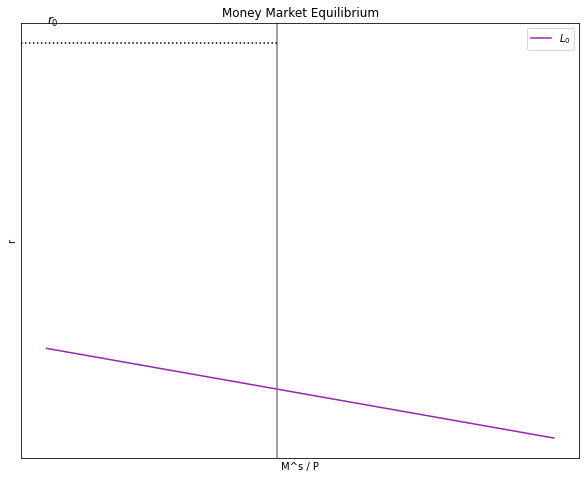

In [6]:
# Equilibrium in Money Market

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = '#9328a8')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "black")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

**Estatica comparativa en el Mercado de Dinero**

**1. Explique y grafique qué sucede en el mercado de dinero si $ΔY < 0$.**

Si el producto cae $ΔY < 0$, la demanda real de dinero también $M^d↓$. Esto requeriría que el Estado aplique una política monetaria contractiva, de tal manera que disminuye la oferta monetaria y puede llegar a un equilibrio de nuevo. Sin emabrgo, este equilibrio es menor al anterior.

$ΔY < 0$

$$ Y↓ → kY↓ → M^d↓ → M^d < M^s $$

:. Se necesita que $M^s↓$ para que halla equilibrio:

$$ M^d = M^s $$

In [45]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
i_LM = 5

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

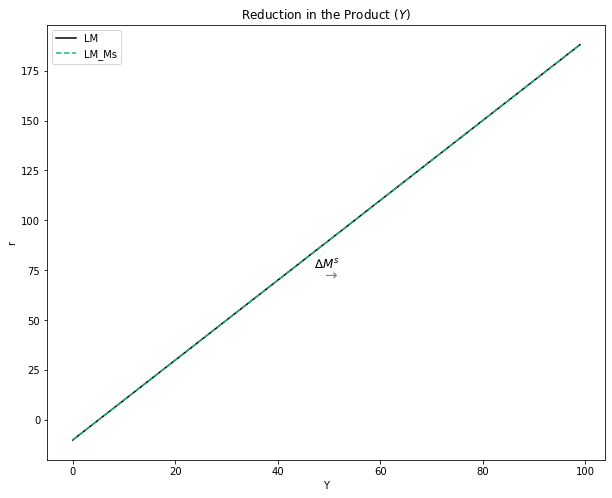

In [46]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#1db875', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Reduction in the Product $(Y)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

**2.  Explique y grafique qué sucede en el mercado de dinero si $Δk < 0$.**

Si k cae $Δk < 0$, la demanda real de dinero también $M^d↓$. Esto requeriría que el Estado aplique una política monetaria contractiva, de tal manera que disminuye la oferta monetaria y puede llegar a un equilibrio de nuevo. Sin emabrgo, este equilibrio es menor al anterior.

$Δk < 0$

$$ k↓ → kY↓ → M^d↓ → M^d < M^s $$

:. Se necesita que $M^s↓$ para que halla equilibrio:

$$ M^d = M^s $$

In [47]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 1

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

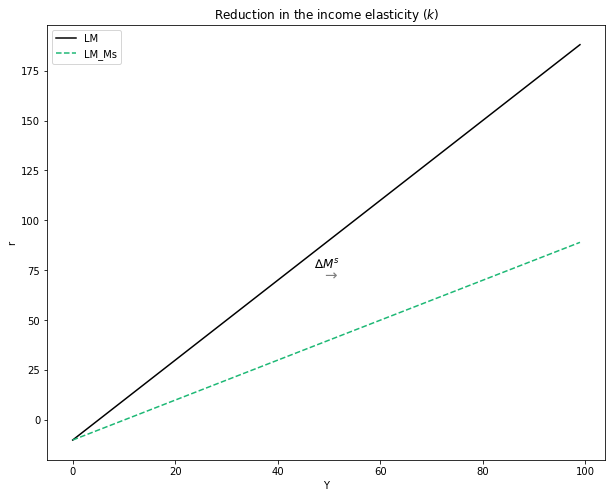

In [48]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#1db875', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Reduction in the income elasticity $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

**3. Explique y grafique qué sucede en el mercado de dinero si $ΔM_s < 0$.**

Si la oferta de dinero cae $ΔM_s < 0$, la oferta real de dinero también $\frac{M^s}{P}↓$. Esto requeriría que el Estado aplique una política monetaria expansiva, de tal manera que aumente la tasa de interés, con ello disminuya la demanda de dinero $M^d↓$ y así pueda llegar a un equilibrio de nuevo. Sin emabrgo, este equilibrio es menor al anterior.

$ΔM_s < 0$

$$ M_s↓ → \frac{M^s}{P}↓ → M^s < M^d $$

:. Se necesita que $M^d↓$ para que halla equilibrio:

$$ M^s = M^d $$

In [51]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 5

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

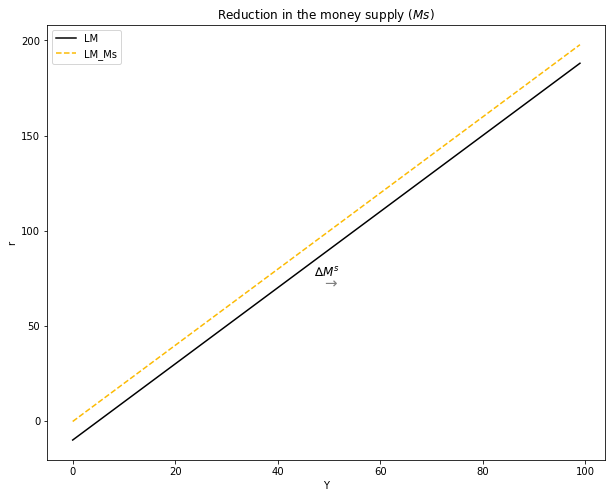

In [52]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#fcba03', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Reduction in the money supply $(Ms)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

**Curva LM**

**1. Derive paso a paso la curva LM matemáticamente (a partir del equilibrio en el Mercado Monetario) y grafique.**

$(1) ... M^d = kY - jr$

$(2) ... \frac{M_o^s}{P}$

$$ M^d = M^s  →  kY - jr = \frac{M^s}{P} $$

$$ kY - \frac{M_o^s}{P} = jr $$

$$ \frac{kY}{j} - \frac{M_o^s}{Pj} = r $$

$$LM →  r = - \frac{M_o^s}{Pj} + \frac{k}{j}Y $$

In [10]:
# Parameters
Y_size = 100

k = 10
j = 10                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)


# Equation

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

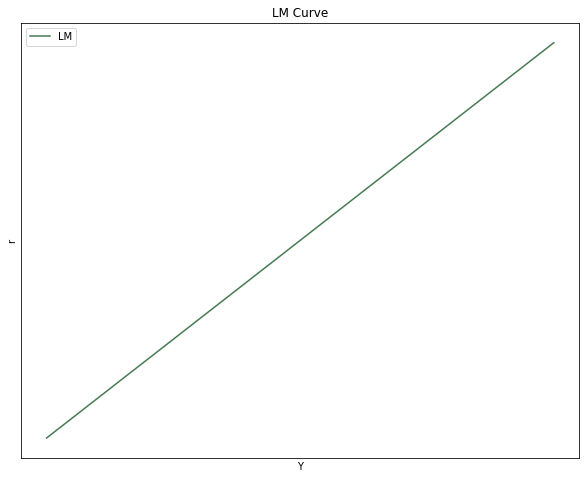

In [11]:
# Graph

# Dimensins
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Remove the quantities from the axes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curves to plot
ax.plot(Y, i, label="LM", color = '#457a51')

# Title and legend
ax.set(title="LM Curve", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

**2. ¿Cuál es el efecto de una disminución en la Masa Monetaria $ΔM_s < 0$? Explica usando la intuición y gráficos.**

Al disminuirse la Masa Monetaria $ΔM_s < 0$, el BCR responde con una política monetaria contractiva. Esto consiste es aumentar la taza de interés, de tal manera que la demanada de dinero caiga $M^d↓$, y así halla equilibrio de nuevo.

$ΔM_s < 0$

$$ ↓M_s → M_s < M^d $$

:. Se necesita que $M^d↓$ para que halla equilibrio:

$$ M^d =  kY - jr $$

Si $r↑$   →   $-jr↑$

Si $-jr↑$   →   $M^d↓$

:. Y así

$$ M_s = M^d $$


In [22]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 500

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

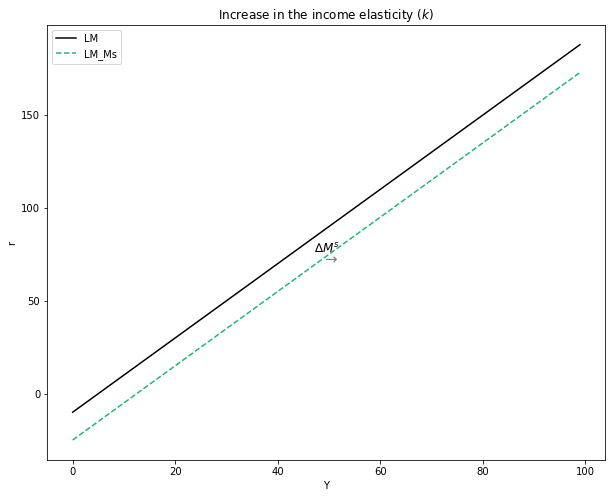

In [23]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#1db875', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Increase in the income elasticity $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

Pero sí $M^d↓$

In [24]:
#--------------------------------------------------
    # Nueva curva donde MS disminuyó

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 500             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
i_LM = 10

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

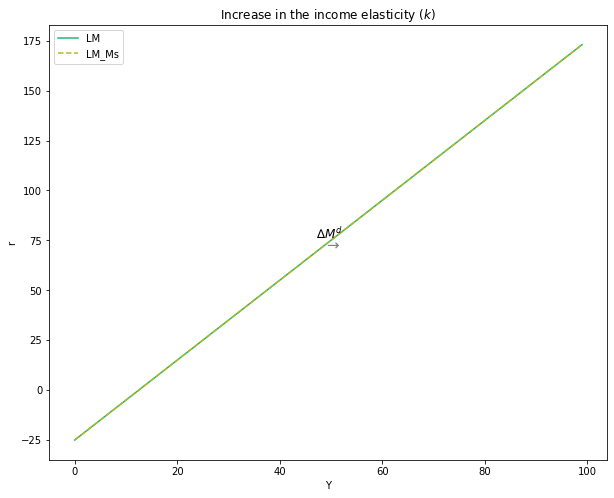

In [28]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = '#1db875')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#b8b81d', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^d$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Increase in the income elasticity $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

**3. ¿Cuál es el efecto de un aumento en k $Δk > 0$? Explica usando intuición y gráficos.**

Al aumentar k (elasticidad del ingreso), el ingreso aumenta , en consecuencia, la demanda de dinero aumenta; por lo tanto, se requiere aumentar la oferta de dinero, es decir la cantidad de dinero, para llegar de nuevo a un equilibrio. Esto es posible con una Política monetaria expansiva.

$$ ↑k → M^d↑ $$

$$ ↑M^d > M^s $$

$$ ↑M^s → M^d = M^s $$


In [15]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 4

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

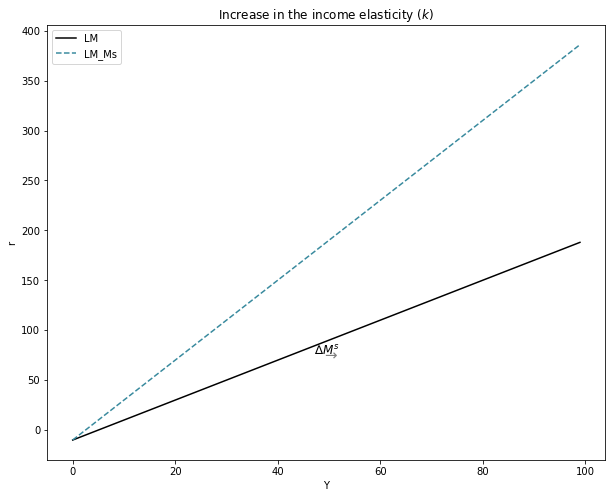

In [16]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#398a9e', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Increase in the income elasticity $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()